In [ ]:
### TODO: Update it to load a saved model instead of creating a new model

### Import libraries

In [1]:
import os
import shutil

import torch
import torch.utils.data
# import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import argparse
import re
import pandas as pd

from helpers import makedir
import model
import push
import train_test_inference as tnt
import save
from log import create_logger
from preprocess import mean, std, preprocess_input_function

### Import some settings

In [2]:
# book keeping namings and code
from settings import base_architecture, img_size, prototype_shape, num_classes, \
                     prototype_activation_function, add_on_layers_type, experiment_run

base_architecture_type = re.match('^[a-z]*', base_architecture).group(0)

model_dir = './saved_models/' + base_architecture + '/' + experiment_run + '/'

### Create the model

In [3]:
# construct the model
base_architecture = 'resnet18'
ppnet = model.construct_PPNet(base_architecture=base_architecture,
                              pretrained=True, img_size=img_size,
                              prototype_shape=prototype_shape,
                              num_classes=num_classes,
                              prototype_activation_function=prototype_activation_function,
                              add_on_layers_type=add_on_layers_type)
#if prototype_activation_function == 'linear':
#    ppnet.set_last_layer_incorrect_connection(incorrect_strength=0)
ppnet = ppnet.to('cuda')
ppnet_multi = torch.nn.DataParallel(ppnet)
class_specific = True

### Inference

In [4]:
path_to_ecg = '../../../data/padmalab_external/special_project/physionet.org/files/ptb-xl/1.0.3/records100_ground_truth/records100_ground_truth_01000/01000_lr-0.png'
prototype_folder = 'saved_models/resnet18/001/img/epoch-30'

/home/tayyibul/anaconda3/envs/ecg_diagnosis_models/lib/python3.9/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Predicted class: Abnormal


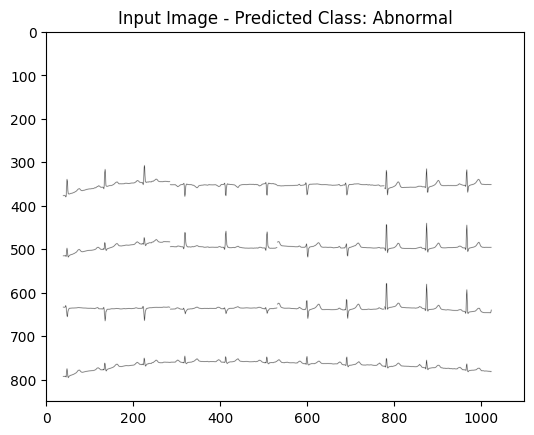

10 30


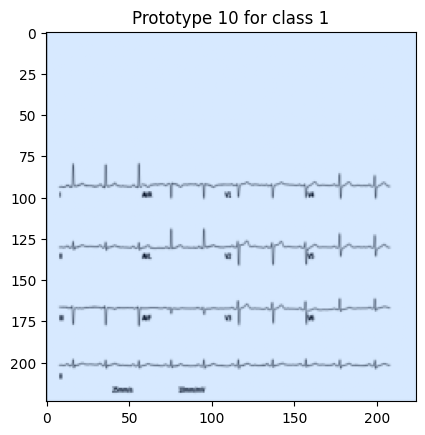

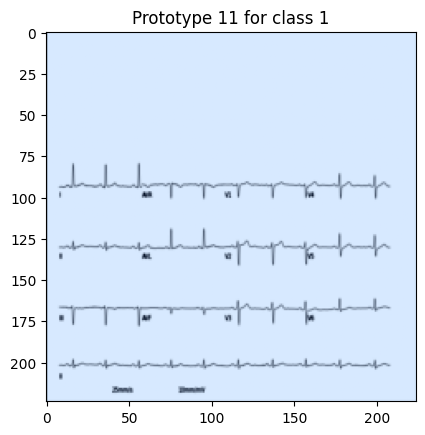

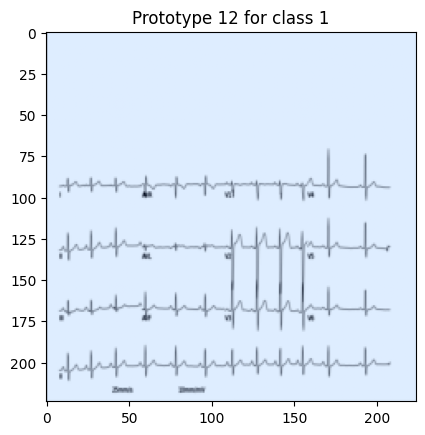

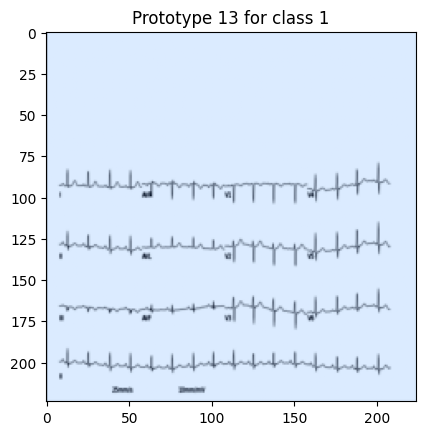

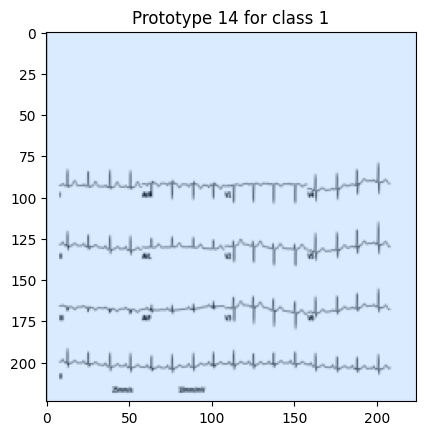

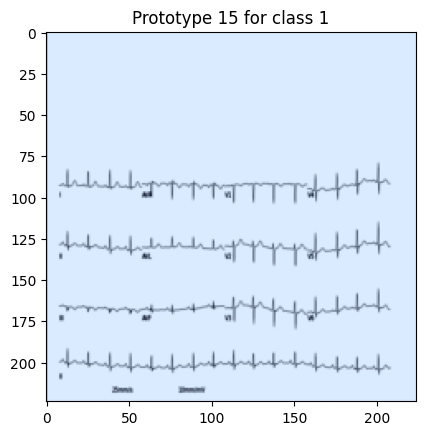

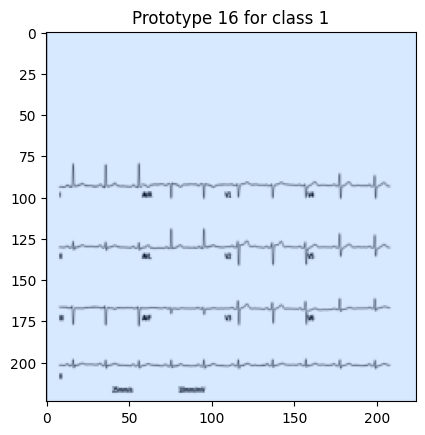

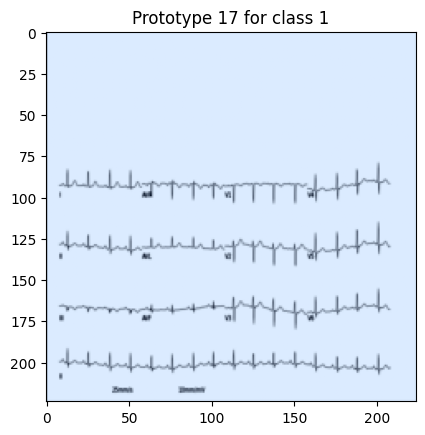

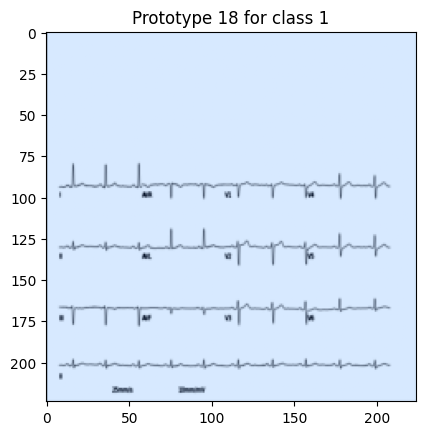

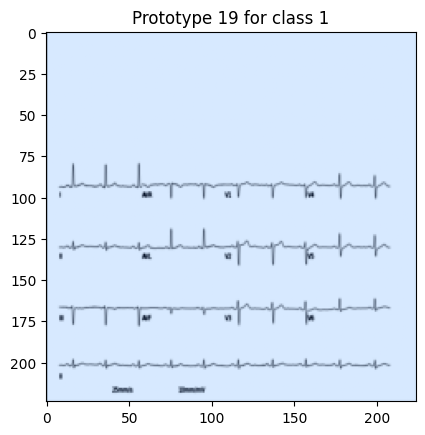

FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/resnet18/001/img/epoch-30/prototype-img20.png'

In [5]:
tnt.inference(model=ppnet_multi, example_path=path_to_ecg, prototype_img_folder=prototype_folder) 